In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import re
from mpl_toolkits.mplot3d import Axes3D

## Section 2 Lecture 11

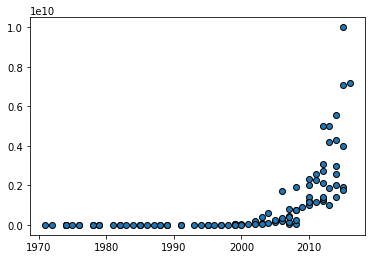

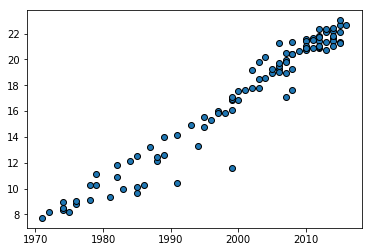

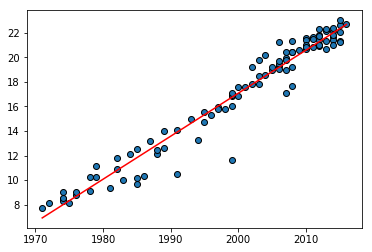

a: 0.35104357336499337 b: -685.0002843816548 R-square: 0.9529442852285758
Time to double: 1.974533172379868 years


In [2]:
# Moore's law
X = []
Y = []
non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
plt.scatter(X, Y, edgecolor='black')
plt.show()

Y = np.log(Y)
plt.scatter(X, Y, edgecolor='black')
plt.show()

denominator1 = X.dot(X) - X.mean()*X.sum()
a1 = (X.dot(Y) - Y.mean()*X.sum()) / denominator1
b1 = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y)) / denominator1
Yhat = a1*X + b1
plt.scatter(X, Y, edgecolor='black')
plt.plot(X, Yhat, c='r')
plt.show()

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print('a:', a1, 'b:', b1, 'R-square:', r2)

print('Time to double:', np.log(2)/a1, 'years')

## Section 3, Lecture 16

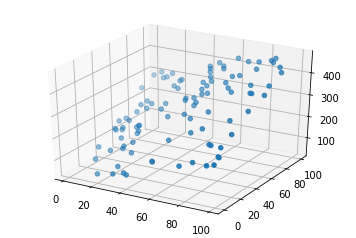

In [3]:
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1])
    Y.append(float(y))
    
X = np.array(X)
Y = np.array(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [4]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print(r2)

0.9980040612475778


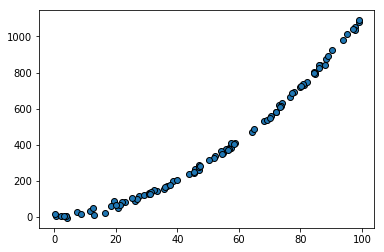

In [5]:
X1 = []
Y1 = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X1.append([x, x*x, 1])
    Y1.append(float(y))
    
X1 = np.array(X1)
Y1 = np.array(Y1)

plt.scatter(X1[:,0], Y1, edgecolor='black')
plt.show()

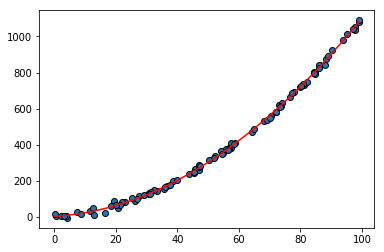

In [6]:
w1 = np.linalg.solve(np.dot(X1.T, X1), np.dot(X1.T, Y1))
Y1hat = np.dot(X1, w1)

plt.scatter(X1[:,0], Y1, edgecolor='black')
plt.plot(sorted(X1[:, 0]), sorted(Y1hat), c='r')
plt.show()

## Section 3, Lecture 18

*** No CODEPAGE record, no encoding_override: will use 'ascii'


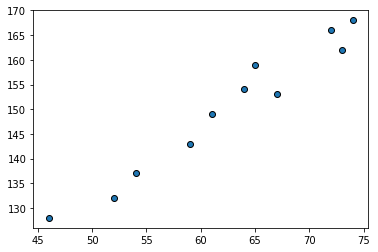

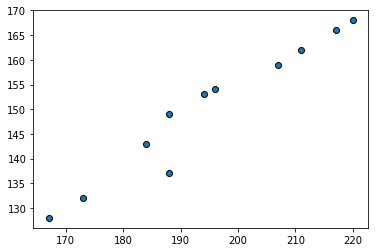

In [7]:
df = pd.read_excel('mlr02.xls')
X = df.as_matrix()

plt.scatter(X[:,1], X[:,0], edgecolor='black')
plt.show()

plt.scatter(X[:,2], X[:,0], edgecolor='black')
plt.show()

In [8]:
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

print('r2 for x2:', get_r2(X2only, Y))
print('r2 for x3:', get_r2(X3only, Y))
print('r2 for x2, x3:', get_r2(X, Y))

r2 for x2: 0.9578407208147356
r2 for x3: 0.9419952085293065
r2 for x2, x3: 0.9768471041502091
